In [1]:
import pandas as pd
import numpy as np
import json

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## RQ1

Measure the WER overtime

In [6]:
# wer = [0.042658] # first WER using original pretrained deepspeech
# iter = [0]
wer = []
iter = []
fpath = "output/europarl-seed2021/result/rv/wav2vec2_deepspeech_deepspeech2_wav2letter_wit/num_iteration_10/text_batch_size_1200/with-estimator-facebook-bart-base-backup.txt"

f = open(fpath, "r")
lines = f.readlines()
i = 0
for l in lines :
    if "Test on ../output/europarl-seed2021/fine_tune_data/test.csv" in l :
        token = l.split()
        for j in range(len(token)) :
            if token[j] == "WER:" :
                i += 1
                iter.append(i)
                wer.append(float(token[j+1].replace(",","")))
f.close()

wer

[0.0468,
 0.044735,
 0.036476,
 0.03097,
 0.029594,
 0.026153,
 0.026841,
 0.0234,
 0.022023,
 0.0234]

No handles with labels found to put in legend.


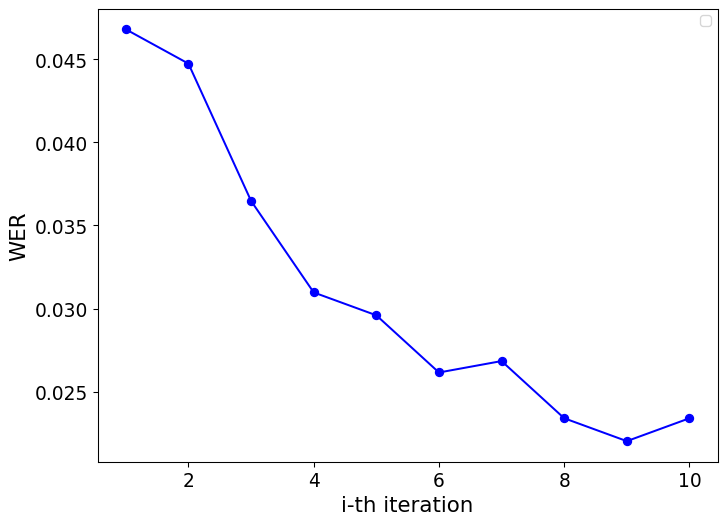

In [10]:
my_dpi = 96
plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.plot(iter, wer, color='blue', marker='o')
# plt.title('', fontsize=14)
plt.xlabel('i-th iteration', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('WER', fontsize=16)
plt.yticks(fontsize=14)
# plt.grid(True)
plt.legend()
plt.savefig("rq1.png", bbox_inches='tight', dpi=my_dpi)
plt.show()

In [11]:
# wer = [0.042658] # first WER using original pretrained deepspeech
# iter = [0]
loss = []
iter = []
fpath = "output/europarl-seed2021/result/rv/wav2vec2_deepspeech_deepspeech2_wav2letter_wit/num_iteration_10/text_batch_size_1200/with-estimator-facebook-bart-base-backup.txt"

f = open(fpath, "r")
lines = f.readlines()
i = 0
for l in lines :
    if "Test on ../output/europarl-seed2021/fine_tune_data/test.csv" in l :
        token = l.split()
        for j in range(len(token)) :
            if token[j] == "loss:" :
                i += 1
                iter.append(i)
                loss.append(float(token[j+1].replace(",","")))
f.close()

loss

[8.642701,
 5.739105,
 4.956687,
 4.495093,
 4.250898,
 3.657655,
 3.633247,
 3.403764,
 3.304127,
 3.327744]

No handles with labels found to put in legend.


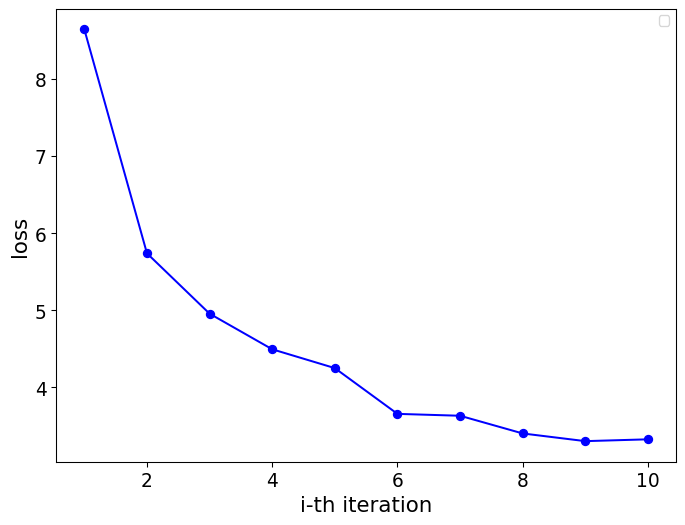

In [12]:
my_dpi = 96
plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.plot(iter, loss, color='blue', marker='o')
# plt.title('', fontsize=14)
plt.xlabel('i-th iteration', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('loss', fontsize=16)
plt.yticks(fontsize=14)
# plt.grid(True)
plt.legend()
plt.savefig("rq1-loss.png", bbox_inches='tight', dpi=my_dpi)
plt.show()

## RQ2

Comparison of the number of failed test cases found with CrossASR++

In [16]:
def load_data(fpath) :
    with open(fpath) as f:
        data = json.load(f)
    return data

### Read result from CrossASR++

In [23]:
fpath = "output/europarl-seed2021/result/rv/deepspeech_deepspeech2_wav2letter_wit_wav2vec2/num_iteration_5/text_batch_size_1200/with-estimator-facebook-bart-base.json"


def crossasr_offset_with_first_iteration(data) :
    nftc = data["number_of_failed_test_cases_all"]
    nftc_first = nftc[0]
    for i in range(1, len(nftc)) :
        nftc[i] -= nftc_first
    del nftc[0]
    data["number_of_failed_test_cases_all"] = nftc

    nftc = data["number_of_processed_texts"]
    nftc_first = nftc[0]
    for i in range(1, len(nftc)) :
        nftc[i] -= nftc_first
    del nftc[0]
    data["number_of_processed_texts"] = nftc

    nftc = data["number_of_failed_test_cases_per_asr"]
    for asr in ["deepspeech", "deepspeech2", "wav2letter", "wav2vec2", "wit"] :
        nftc_first = nftc[asr][0]
        for i in range(1, len(nftc[asr])) :
            nftc[asr][i] -= nftc_first
        del nftc[asr][0]
    data["number_of_failed_test_cases_per_asr"] = nftc

data = load_data(fpath)
crossasr_offset_with_first_iteration(data)
del data["number_of_failed_test_cases_all"]
del data["number_of_processed_texts"]
crossasr = data

### Read result from ASREvolve

In [24]:
def offset_with_first_iteration(data):
    nftc = data["number_of_failed_test_cases_per_asr"]
    nftc_first = nftc[0]
    for i in range(1, len(nftc)) :
        for asr in ["deepspeech2", "wav2letter", "wav2vec2", "wit"] :
            nftc[i][asr] -= nftc_first[asr]
    del nftc[0]
    data["number_of_failed_test_cases_per_asr"] = nftc

def reformat_data(data): #match with crossasr format
    nftc = data["number_of_failed_test_cases_per_asr"]
    temp = {}
    asrs = ["deepspeech2", "finetuned_deepspeech", "wav2letter", "wav2vec2", "wit"] 
    for asr in asrs :
        ftc = []  
        for i in range(4) :
            ftc.append(nftc[i][asr])
        temp[asr] = ftc
    data["number_of_failed_test_cases_per_asr"] = temp


fpath = "output/europarl-seed2021/result/rv/wav2vec2_deepspeech_deepspeech2_wav2letter_wit/num_iteration_7/text_batch_size_1200/with-estimator-facebook-bart-base.json"

data = load_data(fpath)
offset_with_first_iteration(data)
data["number_of_failed_test_cases_per_asr"] = data["number_of_failed_test_cases_per_asr"][:4]
reformat_data(data)
data

asrevolve = data


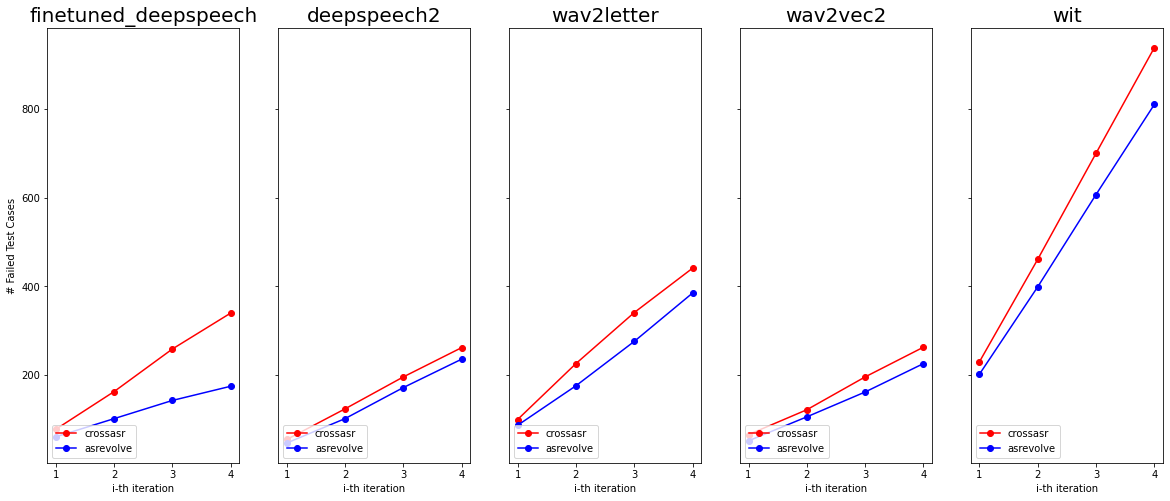

In [39]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 8), sharey=True)

asrs = ["finetuned_deepspeech", "deepspeech2", "wav2letter", "wav2vec2", "wit"] 
iter = list(range(1,5))
for i, asr in enumerate(asrs) :
    asr_name = "deepspeech" if asr == "finetuned_deepspeech" else asr
    axs[i].plot(iter, crossasr["number_of_failed_test_cases_per_asr"][asr_name], marker='o', color="red", label="crossasr")
    axs[i].plot(iter, asrevolve["number_of_failed_test_cases_per_asr"][asr], marker='o', color="blue", label="asrevolve")
    fontdict = {"fontsize": 20}
    axs[i].set_title(asr, fontdict)
    axs[i].set_xlabel('i-th iteration')
    if i == 0 :axs[i].set_ylabel('# Failed Test Cases')
    axs[i].legend(loc='lower left')

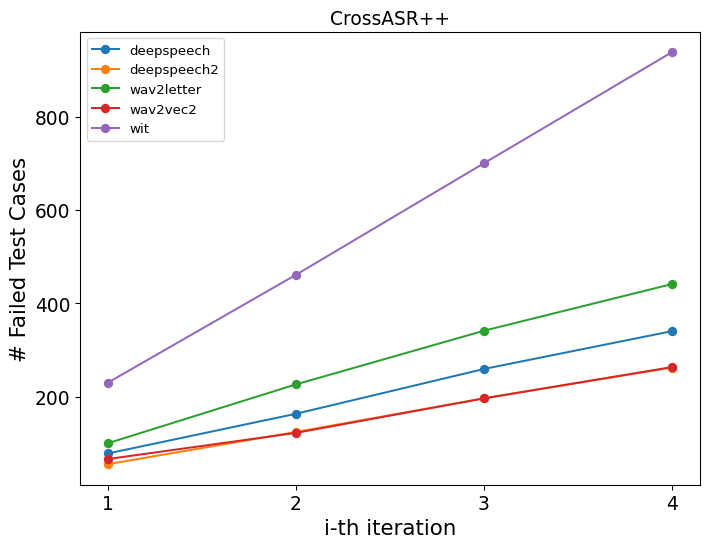

In [55]:
asrs = ["deepspeech", "deepspeech2", "wav2letter", "wav2vec2", "wit"] 

my_dpi = 96
plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
for asr in asrs :
    plt.plot(iter, crossasr["number_of_failed_test_cases_per_asr"][asr], marker='o', label=asr)
plt.title('CrossASR++', fontsize=14)
plt.xlabel('i-th iteration', fontsize=16)
plt.xticks(iter, fontsize=14)
plt.ylabel('# Failed Test Cases', fontsize=16)
plt.yticks(fontsize=14)
# plt.grid(True)
plt.legend()
plt.savefig("rq2.png", bbox_inches='tight', dpi=my_dpi)
plt.show()

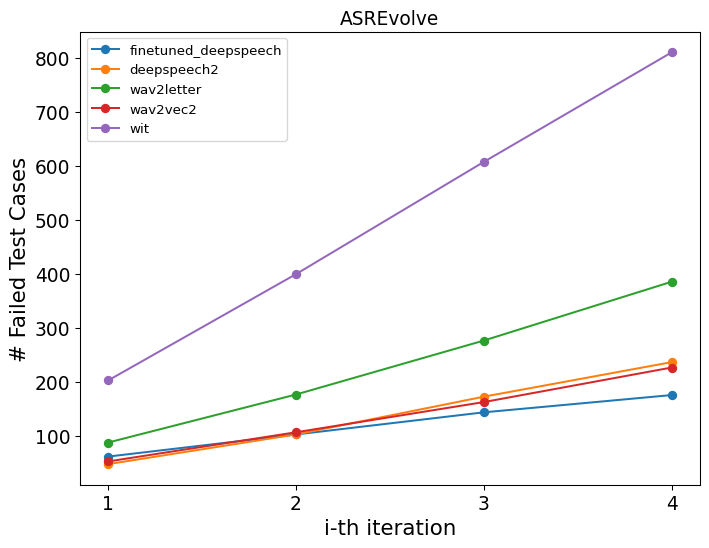

In [56]:
asrs = ["finetuned_deepspeech", "deepspeech2", "wav2letter", "wav2vec2", "wit"] 

my_dpi = 96
plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
for asr in asrs :
    plt.plot(iter, asrevolve["number_of_failed_test_cases_per_asr"][asr], marker='o', label=asr)
plt.title('ASREvolve', fontsize=14)
plt.xlabel('i-th iteration', fontsize=16)
plt.xticks(iter, fontsize=14)
plt.ylabel('# Failed Test Cases', fontsize=16)
plt.yticks(fontsize=14)
# plt.grid(True)
plt.legend()
plt.savefig("rq2.png", bbox_inches='tight', dpi=my_dpi)
plt.show()